In [1]:
import os
from tensorboard.backend.event_processing import event_accumulator
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import torch

In [2]:
engram_dir = '/mnt/smb/locker/abbott-locker/hcnn_vision/'

# Reconstruction Training

In [24]:
def smooth(xs, ys, n=3):
    return np.convolve(ys, np.ones(n)/n, mode='same')

In [25]:
tensorboard_dir = f'{engram_dir}tensorboard/'

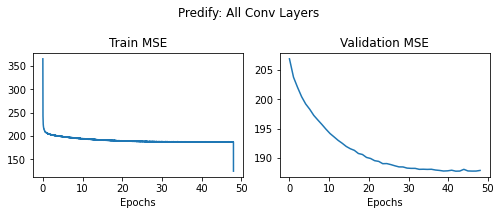

In [27]:
tfdir = tensorboard_dir + 'pefficientnet_b0_lr0.001RMProp/'
tfdir = tensorboard_dir + 'pefficientnet_gaussiannoise/'
tfdir_files = os.listdir(tfdir)
tffiles = [tfdir + f for f in tfdir_files]
tffiles.sort(key=os.path.getctime)
train_loss = []
eval_loss = []

for tffile in tffiles:
    #print('Showing:')
    #print(tffile)
    ea = event_accumulator.EventAccumulator(tffile)
    ea.Reload()

    train_loss.extend([e.value for e in ea.Scalars('MSE Train/Sum')])
    eval_loss.extend([e.value for e in ea.Scalars('MSE Test/Sum')])
    
fig, axs = plt.subplots(1, 2, figsize = (7, 3))   
smoothed_train = smooth(
    np.linspace(0, len(eval_loss), len(train_loss)), train_loss, n=3)
axs[0].plot(
    np.linspace(0, len(eval_loss), len(train_loss))[1:],
    smoothed_train[1:])
axs[0].set_title('Train MSE')
axs[0].set_xlabel('Epochs')
#axs[0].set_ylim(0, 7500)
axs[1].plot(np.linspace(0, len(eval_loss), len(eval_loss)), eval_loss)
axs[1].set_title('Validation MSE')
axs[1].set_xlabel('Epochs')
#axs[1].set_ylim(0, 1500)
plt.suptitle('Predify: All Conv Layers')
plt.tight_layout()
plt.show()

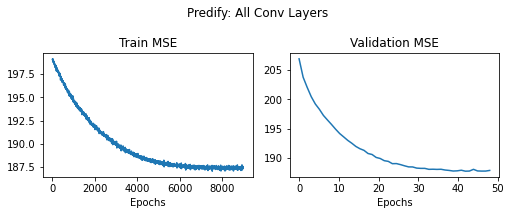

In [28]:
fig, axs = plt.subplots(1, 2, figsize = (7, 3))   
smoothed_train = smooth(
    np.linspace(0, len(eval_loss), len(train_loss)), train_loss, n=10)
axs[0].plot(smoothed_train[1000:-10])
axs[0].set_title('Train MSE')
axs[0].set_xlabel('Epochs')
#axs[0].set_ylim(0, 7500)
axs[1].plot(np.linspace(0, len(eval_loss), len(eval_loss)), eval_loss)
axs[1].set_title('Validation MSE')
axs[1].set_xlabel('Epochs')
#axs[1].set_ylim(0, 1500)
plt.suptitle('Predify: All Conv Layers')
plt.tight_layout()
plt.show()

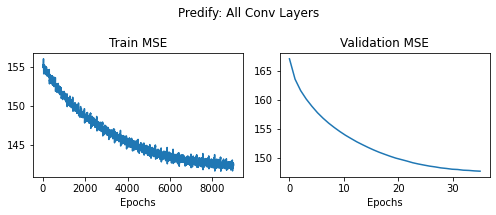

In [23]:
fig, axs = plt.subplots(1, 2, figsize = (7, 3))   
smoothed_train = smooth(
    np.linspace(0, len(eval_loss), len(train_loss)), train_loss, n=10)
axs[0].plot(smoothed_train[1000:-10])
axs[0].set_title('Train MSE')
axs[0].set_xlabel('Epochs')
#axs[0].set_ylim(0, 7500)
axs[1].plot(np.linspace(0, len(eval_loss), len(eval_loss)), eval_loss)
axs[1].set_title('Validation MSE')
axs[1].set_xlabel('Epochs')
#axs[1].set_ylim(0, 1500)
plt.suptitle('Predify: All Conv Layers')
plt.tight_layout()
plt.show()

In [22]:
smoothed_train.shape

(10000,)